In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import urllib.request
import missingno as msno
import joblib
joblib.parallel_backend('loky', n_jobs=-1)
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", message="Could not find the number of physical cores")

In [2]:
url = 'https://raw.githubusercontent.com/goitacademy/MACHINE-LEARNING-NEO/main/datasets/mod_05_topic_10_various_data.pkl'
with urllib.request.urlopen(url) as fl:
    datasets = pickle.load(fl)

In [3]:
autos = datasets['autos']

In [4]:
auto = autos.copy()

In [5]:
print(type(auto))
if isinstance(auto, dict):
    for k in auto:
        print(f'{k}: {type(auto[k])}')
    autos = auto['Autos']
else:
    autos = auto

<class 'pandas.core.frame.DataFrame'>


In [6]:
print("\nDataset 'autos' preview:")
print(autos.head(10))
print()


Dataset 'autos' preview:
          make fuel_type aspiration  ...  city_mpg highway_mpg  price
0  alfa-romero       gas        std  ...        21          27  13495
1  alfa-romero       gas        std  ...        21          27  16500
2  alfa-romero       gas        std  ...        19          26  16500
3         audi       gas        std  ...        24          30  13950
4         audi       gas        std  ...        18          22  17450
5         audi       gas        std  ...        19          25  15250
6         audi       gas        std  ...        19          25  17710
7         audi       gas        std  ...        19          25  18920
8         audi       gas      turbo  ...        17          20  23875
9          bmw       gas        std  ...        23          29  16430

[10 rows x 24 columns]



In [7]:
print()
print(autos.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               193 non-null    object 
 1   fuel_type          193 non-null    object 
 2   aspiration         193 non-null    object 
 3   num_of_doors       193 non-null    int64  
 4   body_style         193 non-null    object 
 5   drive_wheels       193 non-null    object 
 6   engine_location    193 non-null    object 
 7   wheel_base         193 non-null    float64
 8   length             193 non-null    float64
 9   width              193 non-null    float64
 10  height             193 non-null    float64
 11  curb_weight        193 non-null    int64  
 12  engine_type        193 non-null    object 
 13  num_of_cylinders   193 non-null    int64  
 14  engine_size        193 non-null    int64  
 15  fuel_system        193 non-null    object 
 16  bore               193 no

<Axes: >

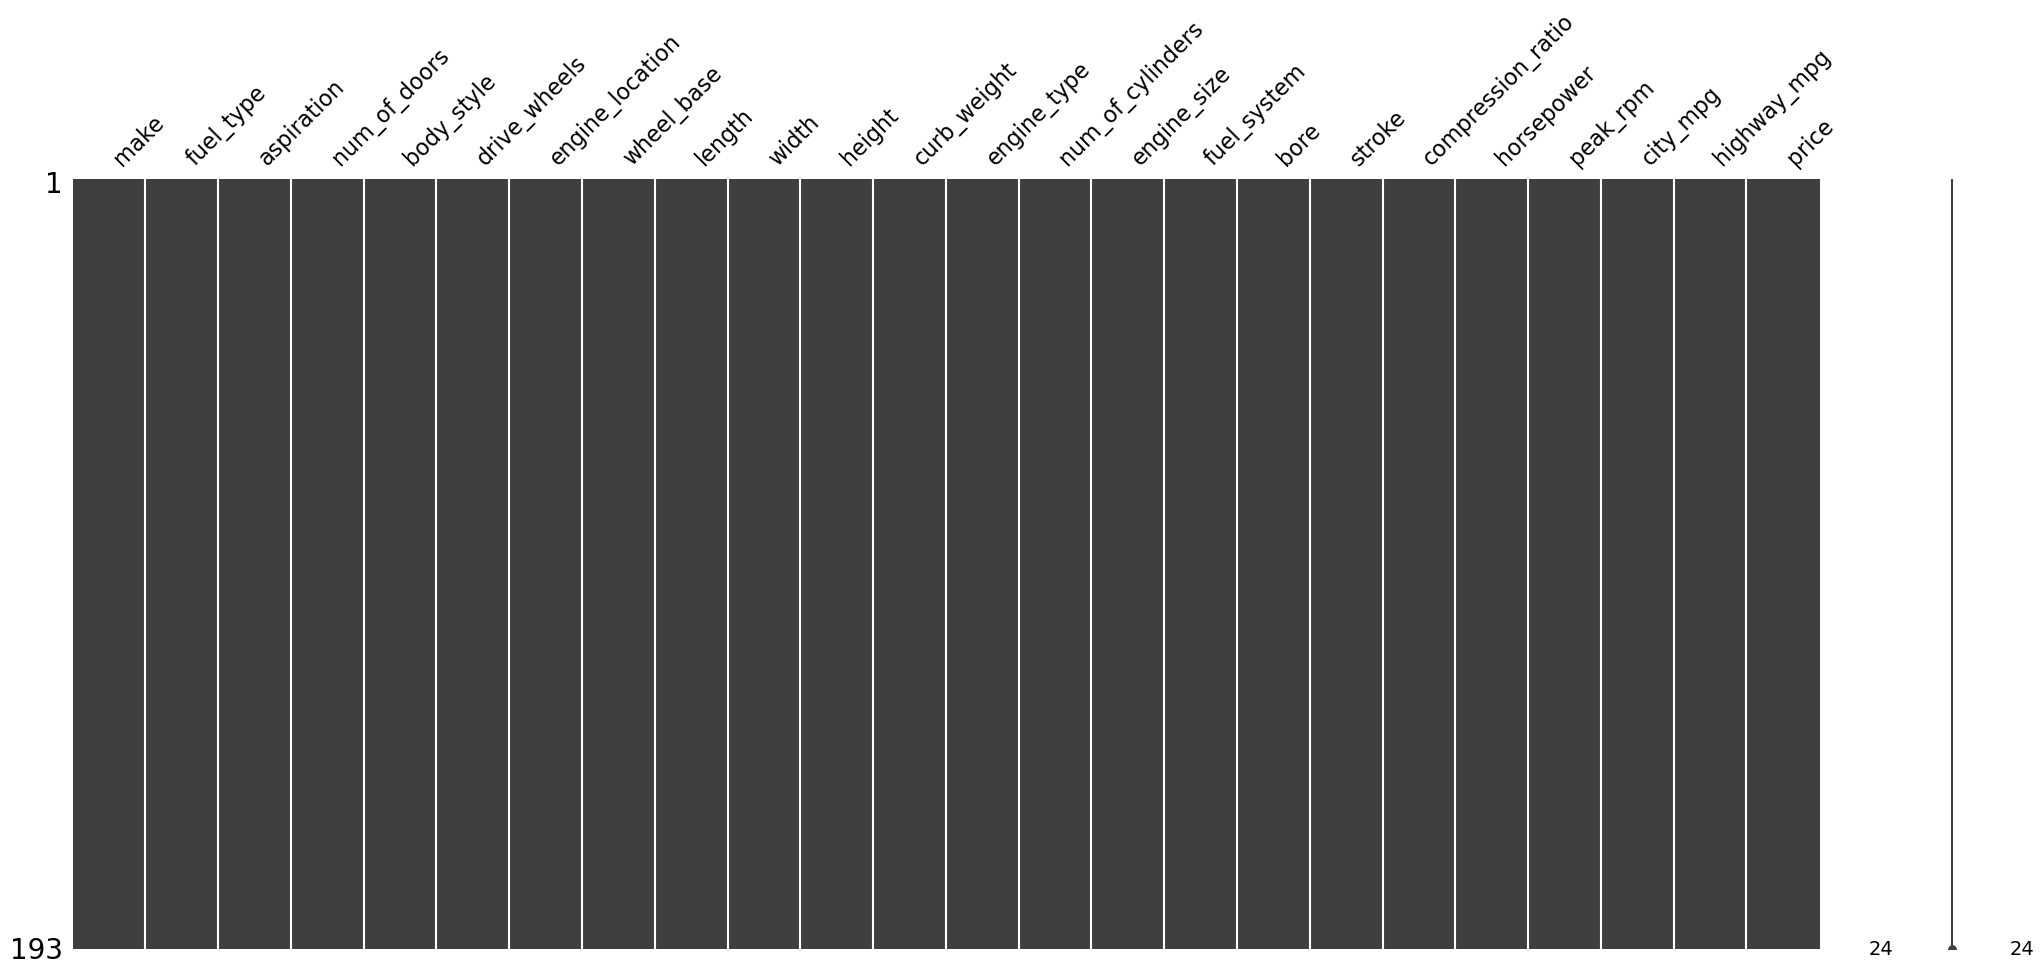

In [8]:
msno.matrix(autos)

In [9]:
print()
print(autos.isnull().sum())


make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64


In [10]:
# Automatic identification of categorical features
categorical = autos.select_dtypes(include=['object', 'category']).columns.tolist()

In [11]:
# Additionally - discrete numerical features
discrete_numerical = [col for col in autos.select_dtypes(include=['int64','float64']).columns
                      if autos[col].nunique() < 20 and col != 'price']

print('Categorical features:', categorical)
print('Discrete numerical features:', discrete_numerical)

Categorical features: ['make', 'fuel_type', 'aspiration', 'body_style', 'drive_wheels', 'engine_location', 'engine_type', 'fuel_system']
Discrete numerical features: ['num_of_doors', 'num_of_cylinders', 'compression_ratio']


In [12]:
# Label Encoding of categorical/discrete features
autos_encoded = autos.copy()

le_dict = {}
for col in categorical:
    le = LabelEncoder()
    autos_encoded[col] = le.fit_transform(autos_encoded[col].astype(str))
    le_dict[col] = le
print()
print(autos_encoded.head(10))


   make  fuel_type  aspiration  ...  city_mpg  highway_mpg  price
0     0          1           0  ...        21           27  13495
1     0          1           0  ...        21           27  16500
2     0          1           0  ...        19           26  16500
3     1          1           0  ...        24           30  13950
4     1          1           0  ...        18           22  17450
5     1          1           0  ...        19           25  15250
6     1          1           0  ...        19           25  17710
7     1          1           0  ...        19           25  18920
8     1          1           1  ...        17           20  23875
9     2          1           0  ...        23           29  16430

[10 rows x 24 columns]


In [13]:
# Target variable
y = autos_encoded['price']
print()
print(y.sort_values())


126     5118
17      5151
46      5195
138     5348
67      5389
       ...  
16     36880
119    37028
64     40960
15     41315
65     45400
Name: price, Length: 193, dtype: int64


In [14]:
# All impute variables except price
X = autos_encoded.drop(columns=['price'])

discrete_features_mask = [col in (categorical + discrete_numerical) for col in X.columns]

In [15]:
# Mutual inframation
mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features_mask)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print()
print('Mutual Inforamtion:\n', mi_series)


Mutual Inforamtion:
 curb_weight          0.918235
engine_size          0.910264
horsepower           0.897513
highway_mpg          0.890139
city_mpg             0.782120
width                0.689797
length               0.614659
wheel_base           0.584241
make                 0.544831
fuel_system          0.483428
bore                 0.482353
stroke               0.383472
height               0.369184
drive_wheels         0.333404
num_of_cylinders     0.331096
peak_rpm             0.214970
engine_type          0.149994
compression_ratio    0.133360
aspiration           0.087994
body_style           0.079794
fuel_type            0.048139
engine_location      0.036912
num_of_doors         0.010938
dtype: float64


In [16]:
# Distribute on train\test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [17]:
# The Model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print()
print('The importance of sings from RandomForest:\n', importances)


The importance of sings from RandomForest:
 engine_size          0.614112
curb_weight          0.227805
horsepower           0.022289
highway_mpg          0.019414
make                 0.017520
width                0.017144
length               0.012224
city_mpg             0.010615
stroke               0.009322
wheel_base           0.007694
num_of_cylinders     0.007439
peak_rpm             0.007291
bore                 0.005807
height               0.005561
drive_wheels         0.003136
engine_type          0.002699
compression_ratio    0.002011
fuel_system          0.001867
body_style           0.001833
num_of_doors         0.001802
fuel_type            0.001448
aspiration           0.000956
engine_location      0.000014
dtype: float64


In [18]:
# Reduction to rank percentages
mi_rank = mi_series.rank(pct=True)
importance_rank = importances.rank(pct=True)

In [19]:
# Unite
ranks_autos = pd.concat([mi_rank, importance_rank], axis=1)
ranks_autos.columns = ['MI Rank', 'Model Importance Rank']
ranks_autos.head(10)

MI Rank  Model Importance Rank
curb_weight  1.000000               0.956522
engine_size  0.956522               1.000000
horsepower   0.913043               0.913043
highway_mpg  0.869565               0.869565
city_mpg     0.826087               0.695652
width        0.782609               0.782609
length       0.739130               0.739130
wheel_base   0.695652               0.608696
make         0.652174               0.826087
fuel_system  0.608696               0.260870

In [20]:
# Melt for seaborn
ranks_melted = ranks_autos.reset_index().melt(id_vars='index',
                                              var_name = 'Metric',
                                              value_name = 'Rank')
ranks_melted.rename(columns={'index': 'Feature'}, inplace=True)
ranks_melted.head(10)

Feature   Metric      Rank
0  curb_weight  MI Rank  1.000000
1  engine_size  MI Rank  0.956522
2   horsepower  MI Rank  0.913043
3  highway_mpg  MI Rank  0.869565
4     city_mpg  MI Rank  0.826087
5        width  MI Rank  0.782609
6       length  MI Rank  0.739130
7   wheel_base  MI Rank  0.695652
8         make  MI Rank  0.652174
9  fuel_system  MI Rank  0.608696

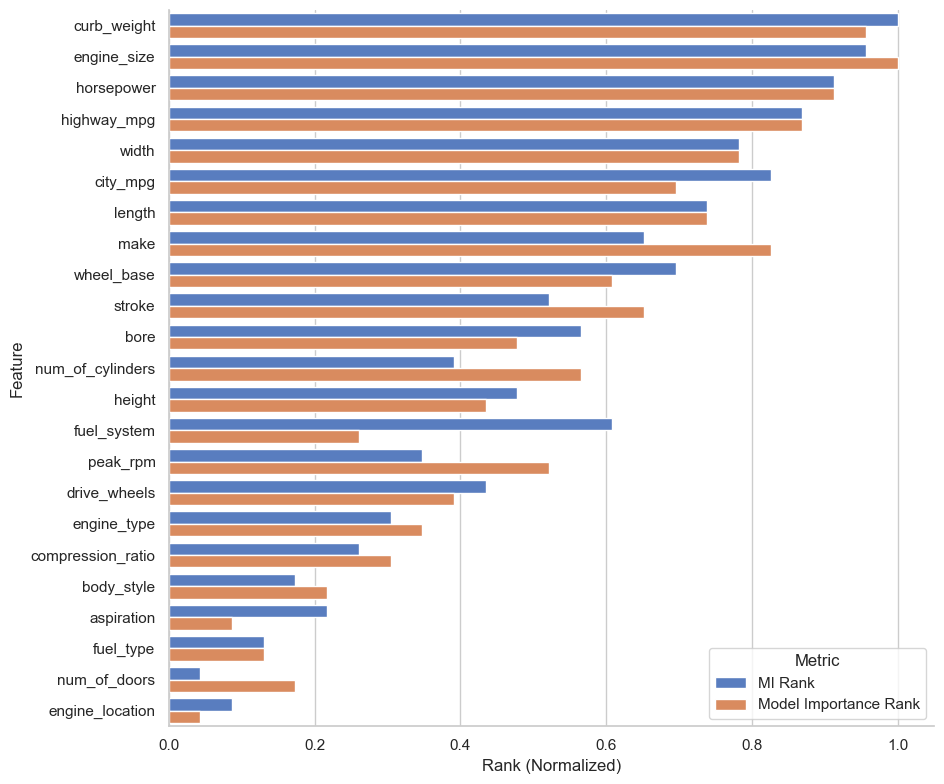

In [21]:
# Draw of a schedule
feature_order = ranks_autos.mean(axis=1).sort_values(ascending=False).index
sns.set(style='whitegrid')

g = sns.catplot(data=ranks_melted,
            kind='bar',
                x='Rank',
                y='Feature',
                hue='Metric',
                order=feature_order,
                height=8,
                aspect=1.2,
                palette='muted',
                legend_out=False)
g.set_titles('Comparison of MI rank values and feature importance')
g.set_xlabels("Rank (Normalized)")
g.set_ylabels("Feature")
plt.tight_layout()
plt.show()

1. Взаємна інформація (Mutual Information):
 * engine_size
 * curb_weight
 * horsepower
 * highway_mpg
 * city_mpg
Вказані ознаки мають сильний (або середній) нелінійний зв'язок із ціною авто.

2. Важливість ознак за RandomForest (feature importance):
 * curb_weight — домінуюча ознака при прогнозуванні ціни.
 * engine_size - має суттєвий вплив.
 * horsepower
 * highway_mpg
 * width
Більшість інших ознак мають незначну вагу для моделі RandomForest, хоча можуть бути корисними в інших типах моделей (наприклад, лінійній регресії або нейронних мережах).

3. engine_size та curb_weight — найважливіші чинники при прогнозуванні вартості авто (і з точки зору MI, і RandomForest).

4. horsepower, highway_mpg, width, length — теж варто включати у модель, хоча їхній вплив менш значний.

5. Більшість категоріальних змінних мають незначний або слабкий вплив, але можуть додати цінності через розширене кодування (OneHot).

6. Дані не мають пропусків, що добре для побудови моделей.

7. Розумне зменшення кількості ознак може покращити продуктивність моделей (feature selection).